# Machine Failure Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('predictive_maintenance.csv')

In this dataset we have two target columns ('Target' and 'Failure Type') so we can predict either failure will occur in machine or we can predict type of failure.
For this project we will consider former one

In [3]:
df.head(30)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [4]:
print(df['Target'].unique())
print(df['Failure Type'].unique())

[0 1]
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Our dataset doesn't contain any missing values

In [6]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

## Model: Under given operation conditions of machine predict failure will occur or not

Dropping columns that are not required.

In [7]:
drop_features = ['UDI', 'Product ID', 'Failure Type']

Since we are predicting type of failure we will dop **Failure Type** to prevent data leakage

In [8]:
df = df.drop(drop_features, axis=1)

In [9]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [10]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

**Type** columns consists three unique string values, following code is used to label encode the values

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le_t = LabelEncoder()

In [13]:
df['Type'] = le_t.fit_transform(df['Type'])

In [14]:
df['Type']

0       2
1       1
2       1
3       1
4       1
       ..
9995    2
9996    0
9997    2
9998    0
9999    2
Name: Type, Length: 10000, dtype: int32

From the countplot it can be observed that our dataset is imbalanced

<AxesSubplot:xlabel='Target', ylabel='count'>

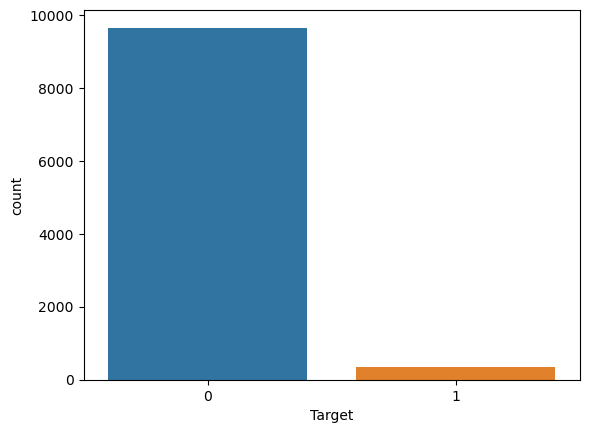

In [15]:
sns.countplot(x = 'Target', data=df)

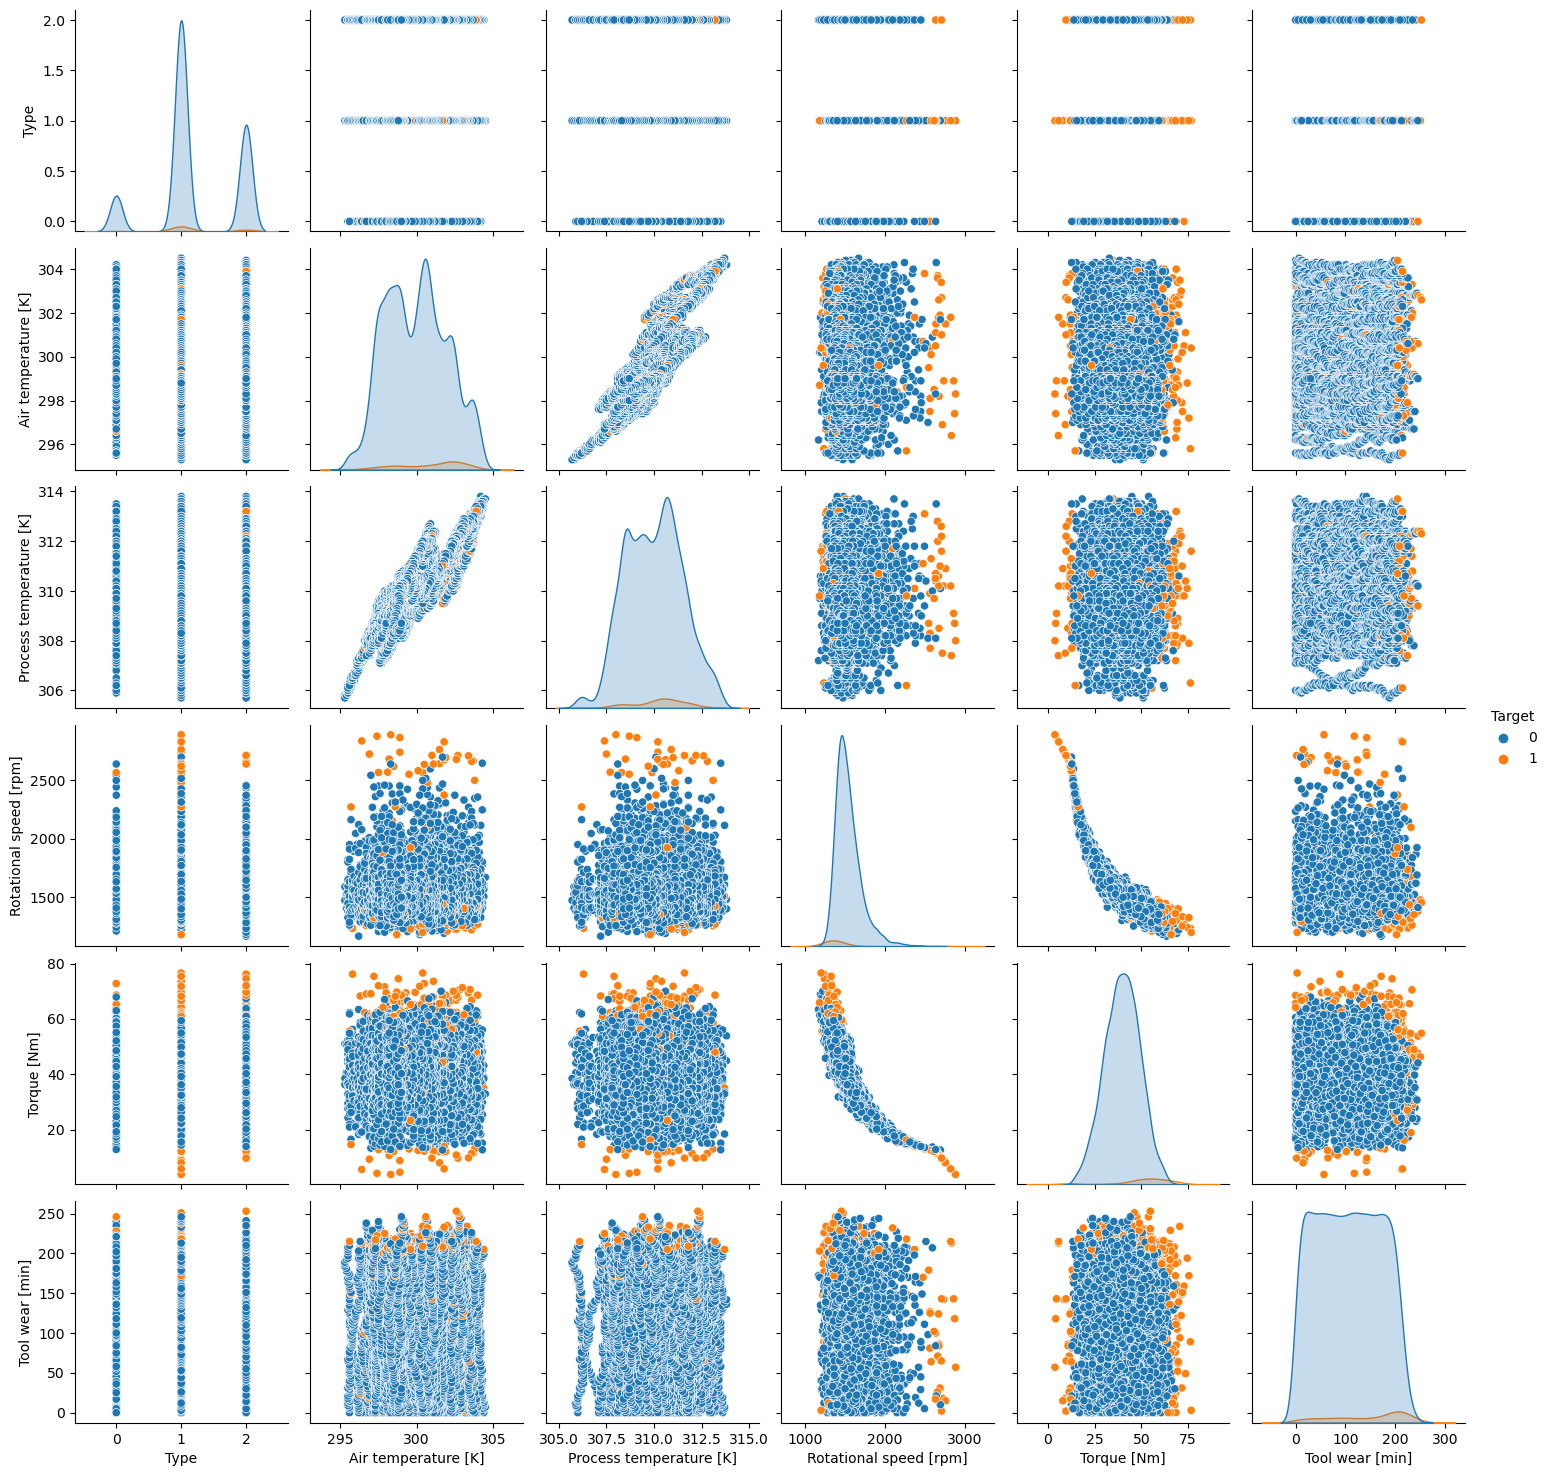

In [16]:
sns.pairplot(df, hue='Target')

correlation can be visualised from the heatmap

<AxesSubplot:>

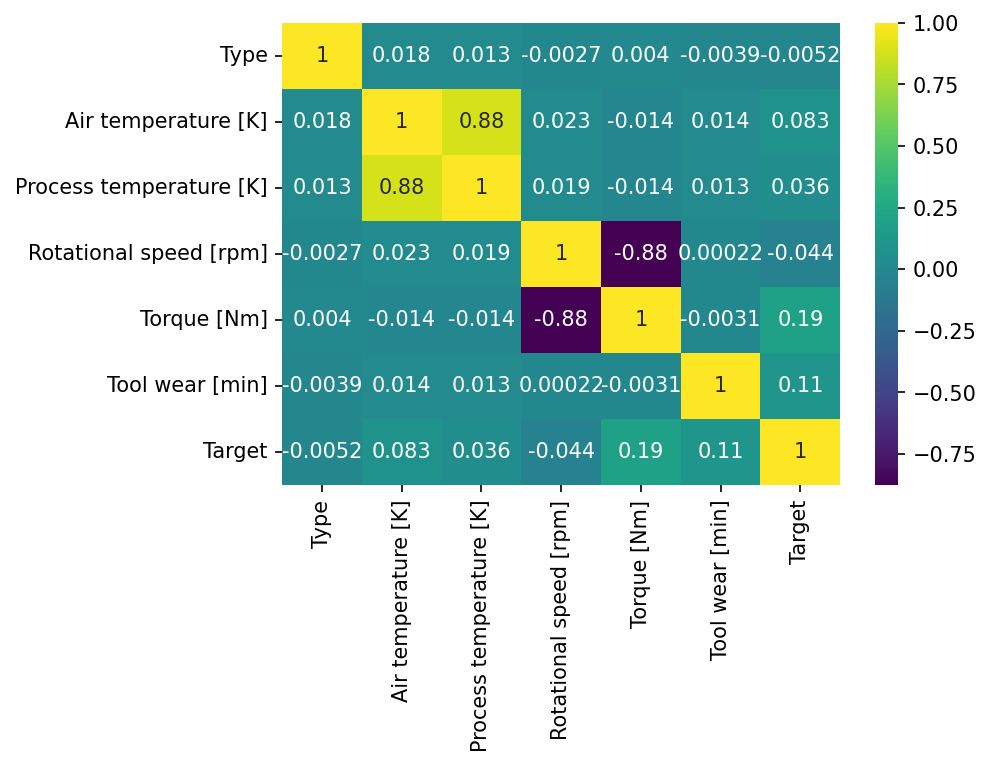

In [17]:
plt.figure(figsize = (6,4), dpi=150)
sns.heatmap(df.corr(), annot=True, cmap = 'viridis')

In [18]:
X = df.drop('Target', axis=1)
y = df['Target']

## Train/Test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_train.shape

((7000, 6), (7000,), (3000, 6), (7000,))

## Standardisation

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM

In [25]:
from sklearn.svm import SVC

In [26]:
base_svm = SVC()

In [27]:
base_svm.fit(X_train, y_train)

SVC()

In [28]:
pred = base_svm.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
accuracy_score(y_test, pred)

0.9763333333333334

In [31]:
confusion_matrix(y_test, pred)

array([[2904,    3],
       [  68,   25]], dtype=int64)

From the classification report we are getting high accuracy but a poor f1-score for class 1.
It is due to the imbalanced dataset

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2907
           1       0.89      0.27      0.41        93

    accuracy                           0.98      3000
   macro avg       0.93      0.63      0.70      3000
weighted avg       0.97      0.98      0.97      3000



### Grid search
For getting opimum hyperparameters

In [33]:
param_grid = {'C':[0.01, 0.1, 0.5, 0.9, 1] ,
             'kernel':['linear', 'rbf', 'poly'] ,
             'degree':[2,3,4] ,
             'gamma':['scale','auto']}

In [34]:
svm = SVC()

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid = GridSearchCV(svm, param_grid)

In [37]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [38]:
grid.best_params_

{'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

In [39]:
grid_pred = grid.predict(X_test)

In [40]:
confusion_matrix(y_test, grid_pred)

array([[2899,    8],
       [  61,   32]], dtype=int64)

With Grid search we got slightly better f1 score for class 1

In [41]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2907
           1       0.80      0.34      0.48        93

    accuracy                           0.98      3000
   macro avg       0.89      0.67      0.73      3000
weighted avg       0.97      0.98      0.97      3000



# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
base_rf = RandomForestClassifier()

In [44]:
base_rf.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
pred = base_rf.predict(X_test)

In [46]:
confusion_matrix(y_test, pred)

array([[2899,    8],
       [  34,   59]], dtype=int64)

Compared to SVM there is a huge improvement in f1-score and accuracy of the model

In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.88      0.63      0.74        93

    accuracy                           0.99      3000
   macro avg       0.93      0.82      0.87      3000
weighted avg       0.99      0.99      0.98      3000



### Grid search
Finding optimal hyperparameters using grid search for further improvement

In [49]:
rf = RandomForestClassifier()

In [50]:
param_grid = {'n_estimators':[50,100,160,200],
              'max_features': [2,3,4],
              'bootstrap' : [True,False],
              'oob_score' : [True,False]   
}

In [51]:
grid = GridSearchCV(rf, param_grid)

In [52]:
grid.fit(X_train, y_train)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\laksh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laksh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\U

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [50, 100, 160, 200],
                         'oob_score': [True, False]})

In [53]:
grid_pred = grid.predict(X_test)

In [54]:
confusion_matrix(y_test, grid_pred)

array([[2897,   10],
       [  25,   68]], dtype=int64)

In [55]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.87      0.73      0.80        93

    accuracy                           0.99      3000
   macro avg       0.93      0.86      0.89      3000
weighted avg       0.99      0.99      0.99      3000



In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

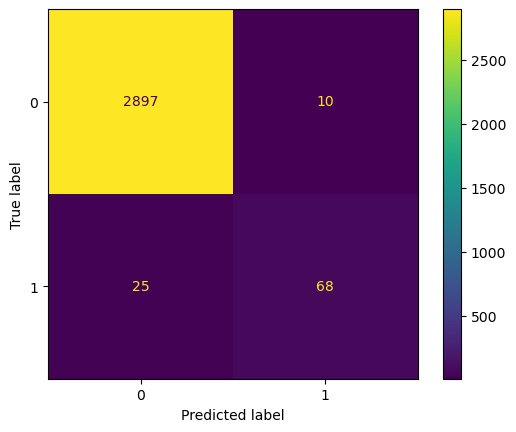

In [57]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

# Thank You !